Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [1]:
# Leo el csv de airbnb con el que voy a trabajar.

airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [2]:
#Me quedo únciamente con los campos que necesito.
df_madrid = subset(airbnb,select=c("City","Room.Type","Neighbourhood","Accommodates","Bathrooms","Bedrooms","Beds","Price","Square.Feet","Guests.Included","Extra.People","Review.Scores.Rating","Latitude", "Longitude"))

Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [3]:
# Filtro el dataset para quedarme solo con casas de tipo Entire home en Madrid.
df_madrid <- df_madrid[df_madrid$Room.Type == "Entire home/apt",]
df_madrid <- df_madrid[df_madrid$City == "Madrid",]

In [4]:
# Elimino las filas que no indican el nombre del barrio.
df_madrid$Neighbourhood[df_madrid$Neighbourhood == ""] <- NA 
df_madrid <- df_madrid[!is.na(df_madrid$Neighbourhood), ]

In [5]:
# Añado el campo de metros cuadrados al dataset de df_madrid.
df_madrid$Square.Meters <- (df_madrid$Square.Feet*0.092903)

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [6]:
#Porcentaje que nos muestran los metros cuadrados:
na <- df_madrid[df_madrid$Square.Meters == "NA",]
percent_na = (nrow(na)/nrow(df_madrid))*100

In [7]:
#Porcentaje: 
print(paste("Porcentaje de apartamentos que no muestran los metros cuadrados", round(percent_na,2),"%"))

[1] "Porcentaje de apartamentos que no muestran los metros cuadrados 93.8 %"


De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [8]:
#Porcentaje que nos muestra los apartamentos con más de 0 metros cuadrados y valor no nulo:
zero <- df_madrid[!is.na(df_madrid$Square.Meters), ]
zero <- zero[zero$Square.Meters == 0, ]
percent_zero <- (nrow(zero)/nrow(df_madrid))*100

In [9]:
#Porcentaje: 
print(paste("Porcentaje de apartamentos que no muestran valores igual a cero o nulos para los metros cuadrados", round(percent_zero,2),"%"))

[1] "Porcentaje de apartamentos que no muestran valores igual a cero o nulos para los metros cuadrados 2.29 %"


Reemplazar todos los 0m^2 por NA 

In [10]:
#Convierto todos los los valores equivalentes a cero metros cuadrados en valores nulos 'NA'.
df_madrid$Square.Meters[df_madrid$Square.Meters == 0] <- NA 

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA.

Antes de eso deberíamos pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.

In [11]:
#df_madrid <- df_madrid[!is.na(df_madrid$Square.Meters), ] # Elimino los valores nulos.
df_madrid <- df_madrid[df_madrid$Square.Meters >= 1 ,] # Al menos tienen 1 metro cuadrado.
df_madrid <- df_madrid[df_madrid$Square.Meters <= 180,] # Elimino las muestras que tengan más de 180 metros cuadrados,para eliminar valores puntuales que se van a valores muy altos y poco comunes.

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [12]:
#Convierto los valores inferior a 20 metros cuadrados en valores nulos.
df_madrid$Square.Meters[df_madrid$Square.Meters <= 20] <- NA

#Elimino los valores nulos dentro del campo de metros cuadrados.
#df_madrid <- df_madrid[!is.na(df_madrid$Square.Meters), ]

Warning message:
"package 'ggplot2' was built under R version 4.0.2"
Warning message:
"Removed 5427 rows containing non-finite values (stat_bin)."


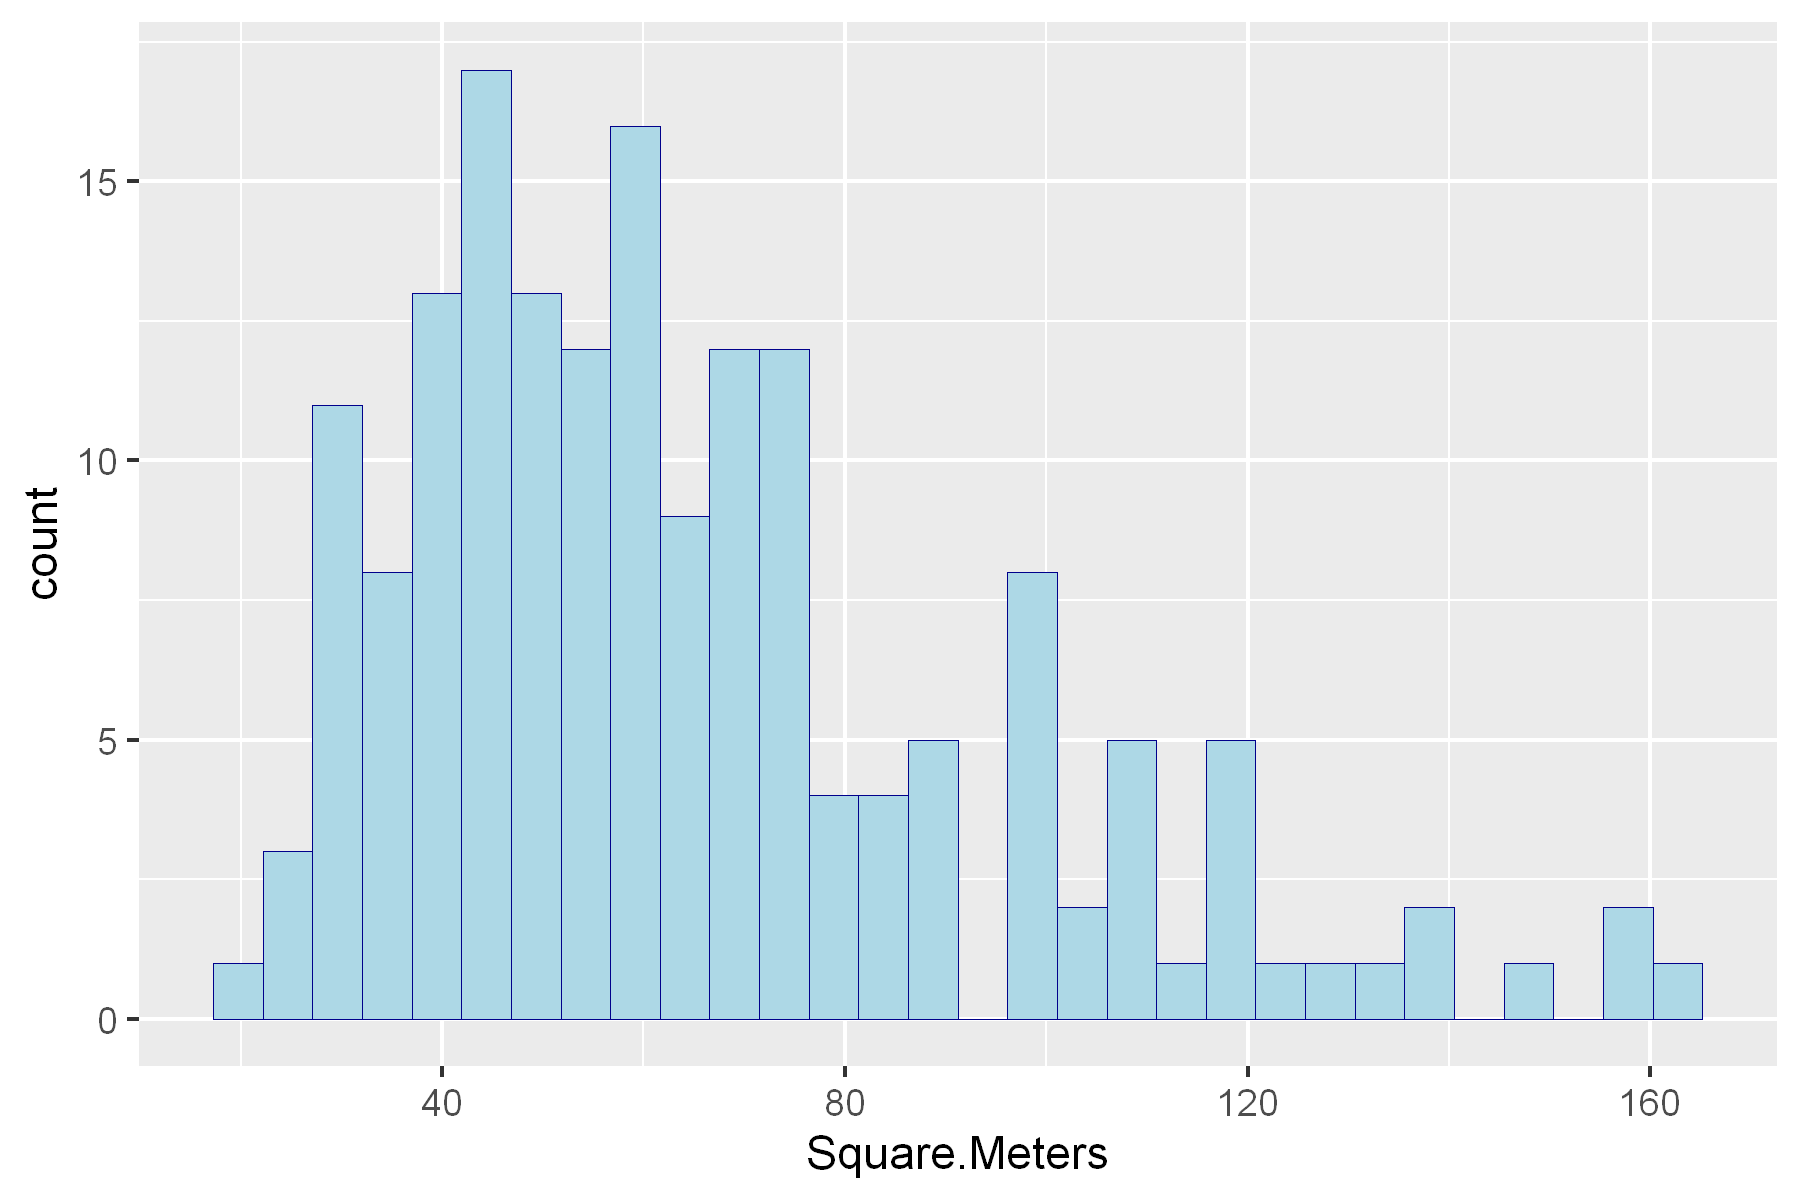

In [13]:
library(ggplot2)
ggplot(df_madrid, aes(x=Square.Meters))+
  geom_histogram(color="darkblue", fill="lightblue", bins = 30, lwd=0.2)

In [14]:
#Elimino los campos innecesarios para crear los clusters.
df_madrid$City <- NULL
df_madrid$Room.Type <- NULL

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

Warning message in resm[lower.tri(resm)] <- round(tky.result$p.adj, 4):
"número de items para para sustituir no es un múltiplo de la longitud del reemplazo"
Warning message:
"package 'reshape2' was built under R version 4.0.3"


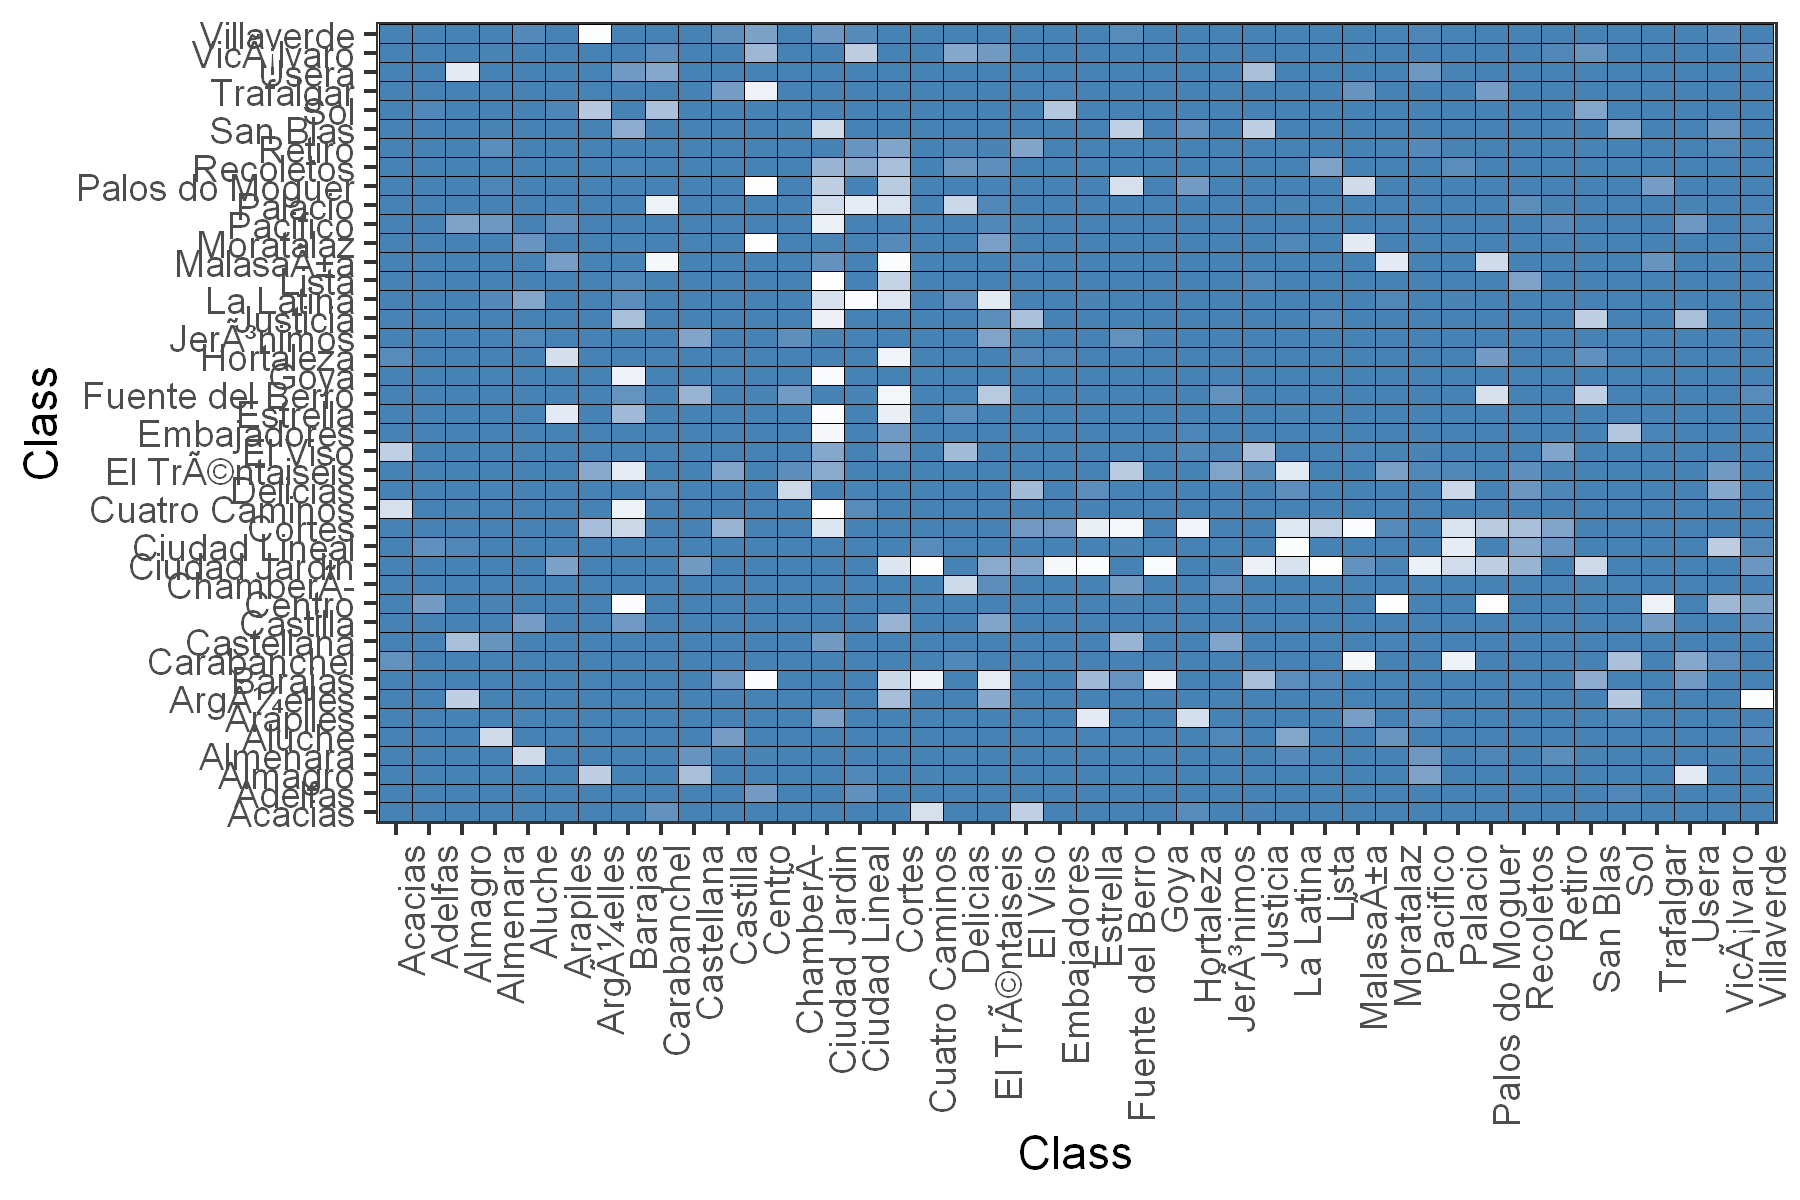

In [15]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


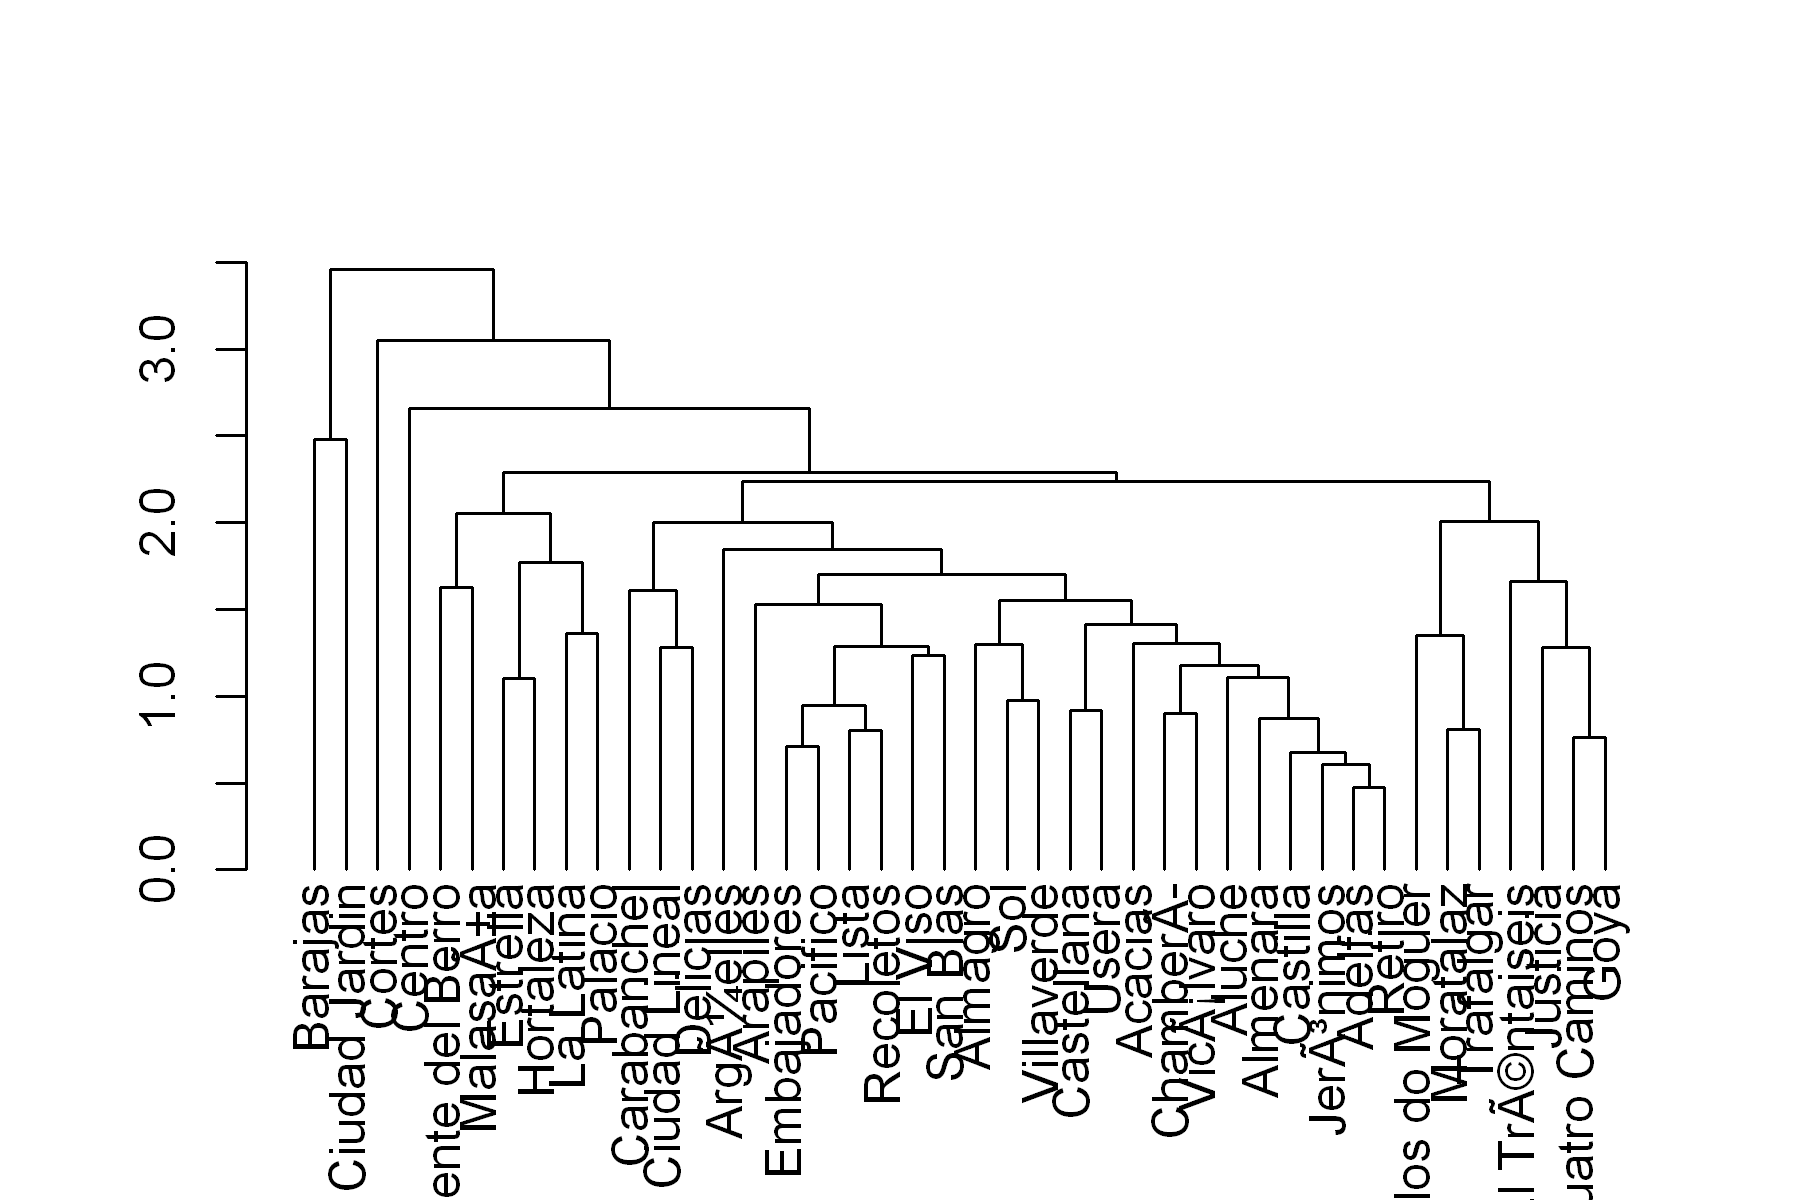

In [16]:
d <- dist(as.matrix(1-resm),method = "euclidean")
hc <- hclust(d,method="complete")
hcd <- as.dendrogram(hc)
plot(hcd)

Estableciendo un punto de corte en 0.9, ¿cuantos clusters aparecen?

In [17]:
#Aparecen 34 clusters.
clusters <- cut(hcd, h = 0.9)$lower

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [18]:
# Saco la tabla que muestra el cluster al que pertenece cada barrio después del corte.
table_tree <-table(cn, cutree(hc,h=0.9)) 

# Convierto la tabla en un dataframe para poder trabajar con el.
dataset <- data.frame(table_tree) 

In [19]:
 # Llevo a cabo una operación para limpiar el dataset y quedarme con los datos que me interesan.
dataset <- dataset[dataset$Freq ==1,]

In [20]:
# Elimino la columna de frecuencia. La cual ya no necesito para nada.
dataset$Freq <- NULL 

In [21]:
# Renombro las columnas del dataset para poder hacer a continuación un merge.
colnames(dataset) <- c("Neighbourhood","Cluster") 

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [22]:
# Incluye en el dataset original "df_madrid" una columna nueva "Cluster", que indica el cluster al que pertenece cada barrio
# tras hacer el corte.
df_madrid <- merge(df_madrid,dataset,by=c("Neighbourhood"), all = TRUE)

In [23]:
df_madrid <- df_madrid[!is.na(df_madrid$Neighbourhood), ]

In [24]:
model <- lm(data = df_madrid, formula = Square.Meters~Cluster+Price+Bedrooms)
summary(model)


Call:
lm(formula = Square.Meters ~ Cluster + Price + Bedrooms, data = df_madrid)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.877  -9.170  -0.098   6.016  60.859 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  42.00874   10.15235   4.138 6.07e-05 ***
Cluster2     -1.79793   11.31545  -0.159   0.8740    
Cluster3    -15.72923   20.03475  -0.785   0.4337    
Cluster5     10.79156   15.91066   0.678   0.4987    
Cluster6      4.57423   14.20160   0.322   0.7479    
Cluster7    -26.75329   20.03843  -1.335   0.1840    
Cluster8     -6.50091   14.29385  -0.455   0.6500    
Cluster9      5.06362   15.03186   0.337   0.7367    
Cluster10   -38.73778   20.03843  -1.933   0.0553 .  
Cluster11    -4.13385   20.03522  -0.206   0.8368    
Cluster12    -5.33528   20.03325  -0.266   0.7904    
Cluster13    -2.80059   15.91302  -0.176   0.8606    
Cluster14   -26.06167   11.60413  -2.246   0.0263 *  
Cluster15    -5.24051   13.33904  -0.393   0.6950    

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

Warning message:
"Removed 45 rows containing non-finite values (stat_bin)."


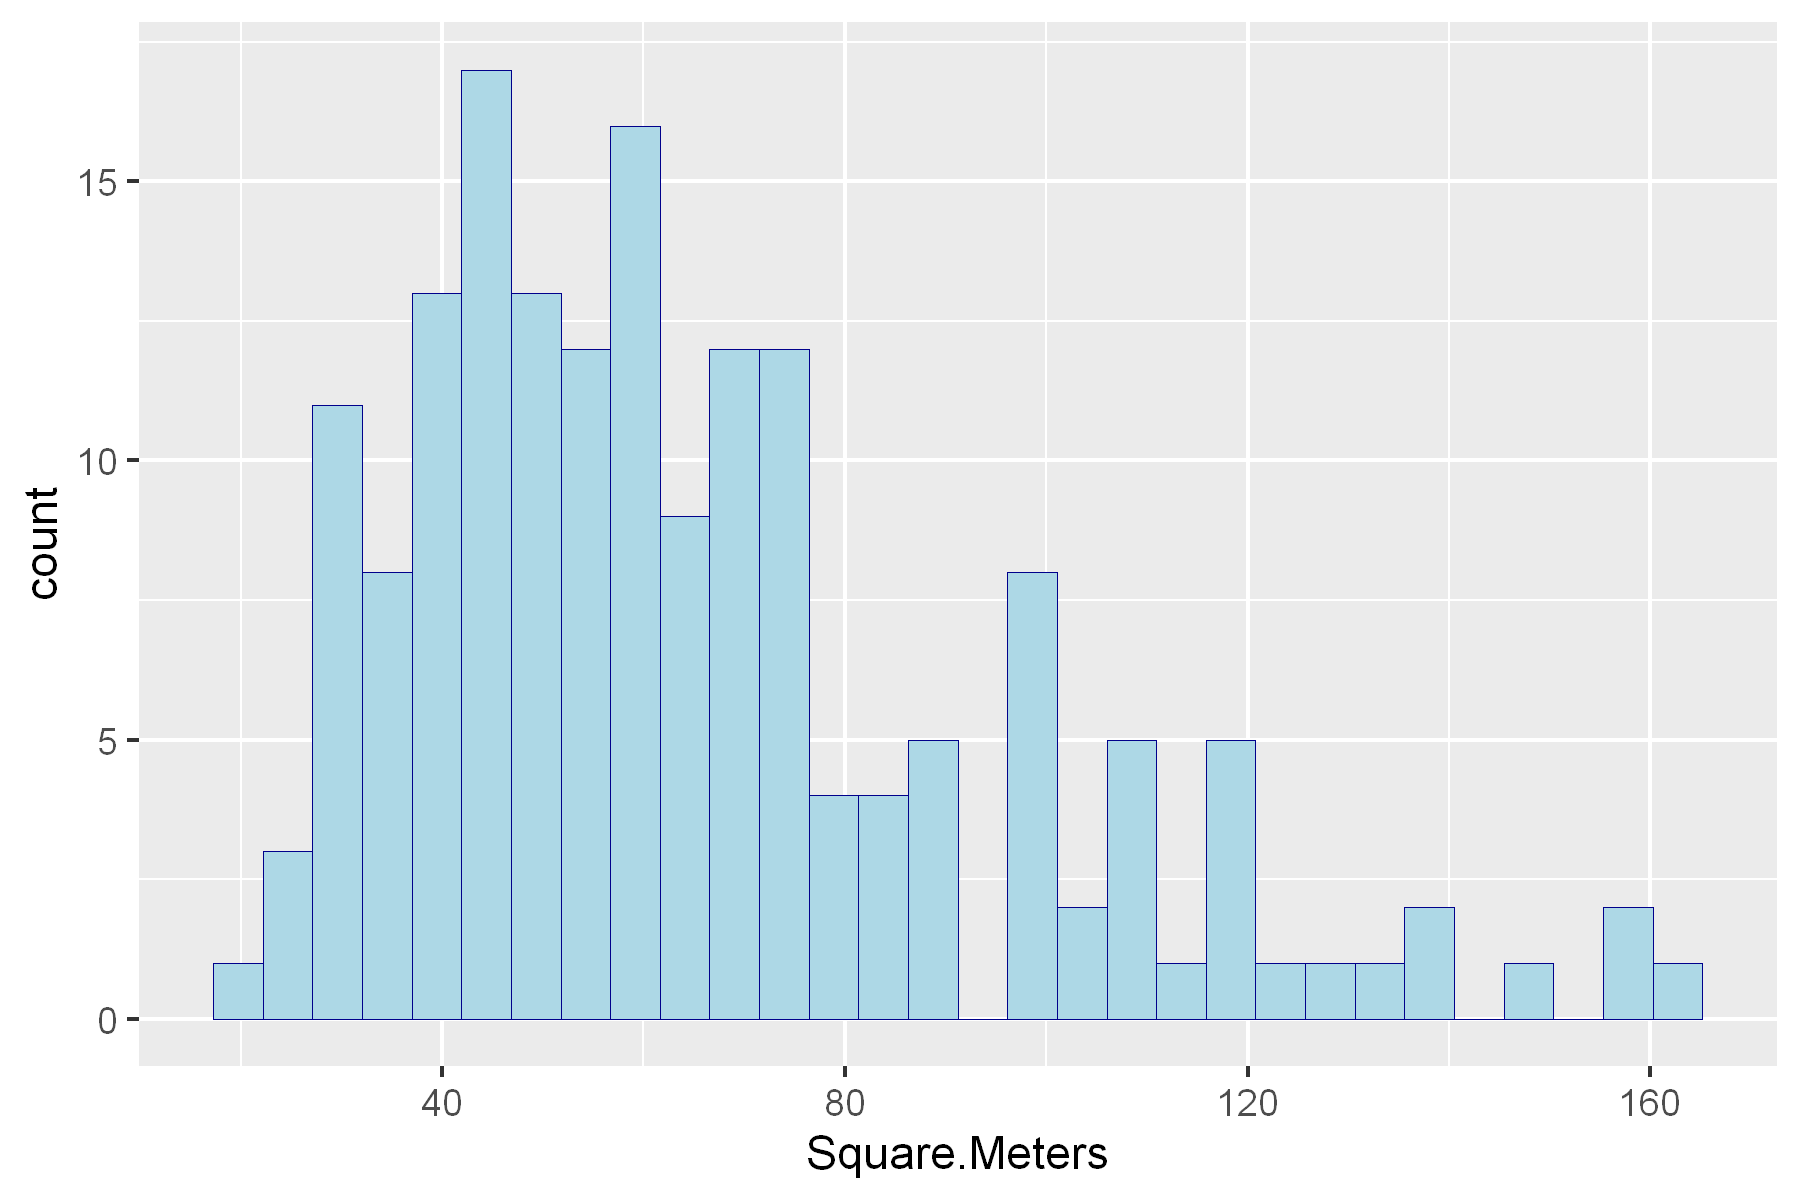

In [25]:
# Dibujo el histograma de los residuos.

ggplot(df_madrid, aes(x=Square.Meters))+
  geom_histogram(color="darkblue", fill="lightblue", bins = 30, lwd=0.2)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates) con un precio de 80€/noche y 3 habitaciones en el barrio de Sol.
¿Cuantos metros cuadrados tendría?
¿Como varía sus metros cuadrados con cada habitación adicional?

In [26]:
#Modelo predictivo para calcular metros cuadrados.
model<-lm(data=df_madrid,formula="Square.Meters~Accommodates+Bedrooms+Price+Neighbourhood")

In [27]:
#Predicción.
predict(model,data.frame(Accommodates=6,Bedrooms=3,Price=80,Neighbourhood="Sol"))

1 
93.23453

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [28]:
#Sustiyo todos los valores nulos de Square.Meters por 93.23453.
df_madrid$Square.Meters[is.na(df_madrid$Square.Meters)] <- 93.23453

In [29]:
model<-lm(data=df_madrid,formula="Square.Meters~Bedrooms")

In [30]:
one <- predict(model, data.frame(Bedrooms=1))
two <- predict(model, data.frame(Bedrooms=2))
three <- predict(model, data.frame(Bedrooms=3))
four <- predict(model, data.frame(Bedrooms=4))
five <- predict(model, data.frame(Bedrooms=5))

In [31]:
first_reference <- two-one
second_reference <- three-two
third_reference <- four-three
four_reference <- five-four
mean <- (first_reference+second_reference+third_reference+four_reference)/4

In [32]:
#Cuantos metros cuadrados aumenta cada vivienda por cada habitación de más.
round(mean,2)

1 
18.47

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [33]:
df_madrid = subset(df_madrid,select=c("Accommodates","Bathrooms","Bedrooms","Beds","Price","Square.Feet","Guests.Included","Extra.People","Review.Scores.Rating","Latitude", "Longitude","Square.Meters"))

In [34]:
df_madrid <- na.omit(df_madrid)

In [36]:
matrix_madrid <- rbind(df_madrid)

In [37]:
matrix_madrid[sample(1:nrow(matrix_madrid),10),1:12] 

Accommodates Bathrooms Bedrooms Beds Price Square.Feet Guests.Included
121 4            1         2        1    100    700        2              
45  2            1         0        1     76     40        2              
92  6            2         2        3     75    753        2              
122 6            3         4        3    170   1507        5              
53  9            2         3        8    100   1184        4              
163 5            1         1        1     62    538        3              
90  2            1         0        1     40    237        1              
75  2            1         1        1     52    538        1              
72  4            1         1        2     50    592        2              
161 4            1         1        2     65    646        2              
    Extra.People Review.Scores.Rating Latitude Longitude Square.Meters
121 10            92                  40.40958 -3.710425  65.03210    
45  11            92                  40.41502 -3.700622  93.23453    
92  10            95                  40.42556 -3.700667  69.95596    
122  0            96                  40.43287 -3.675902 140.00482    
53  10            90                  40.45241 -3.699048 109.99715    
163 10           100                  40.41707 -3.708815  49.98181    
90   0            80                  40.42179 -3.700626  22.01801    
75   0            95                  40.40803 -3.698546  49.98181    
72  15            88                  40.41153 -3.699984  54.99858    
161 45            94                  40.41974 -3.709047  60.01534

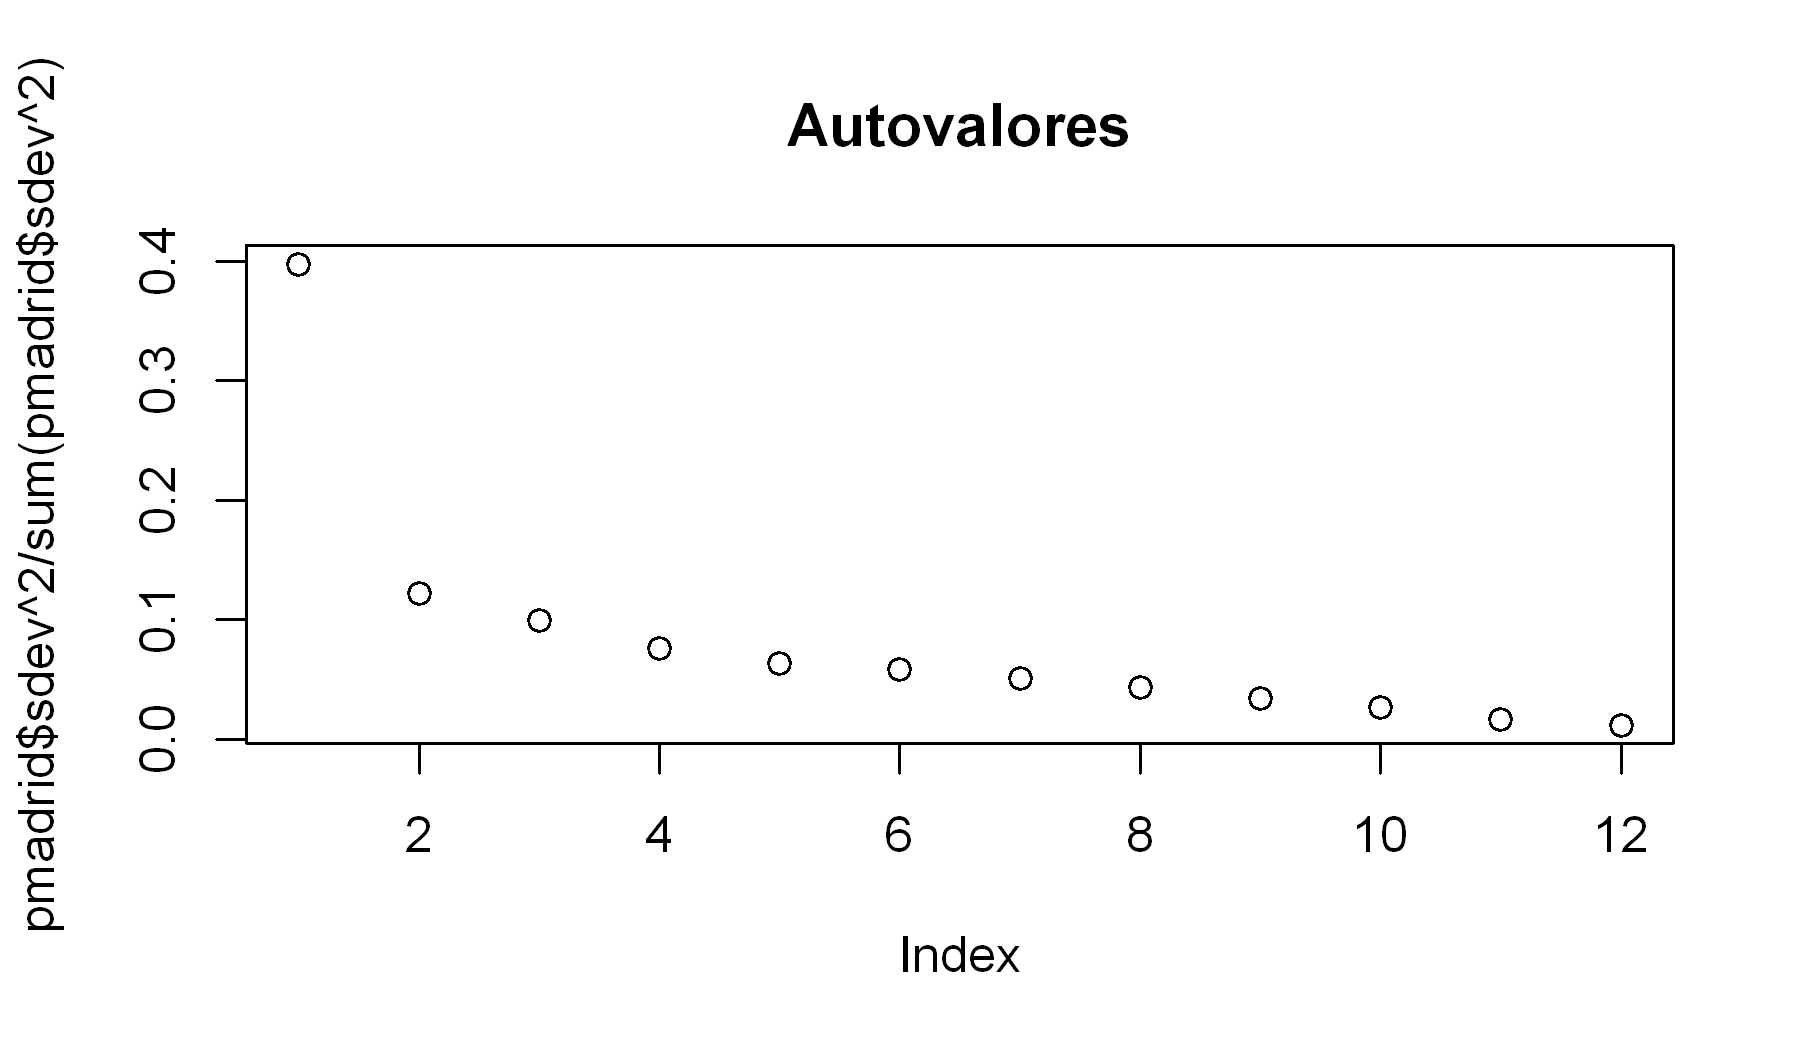

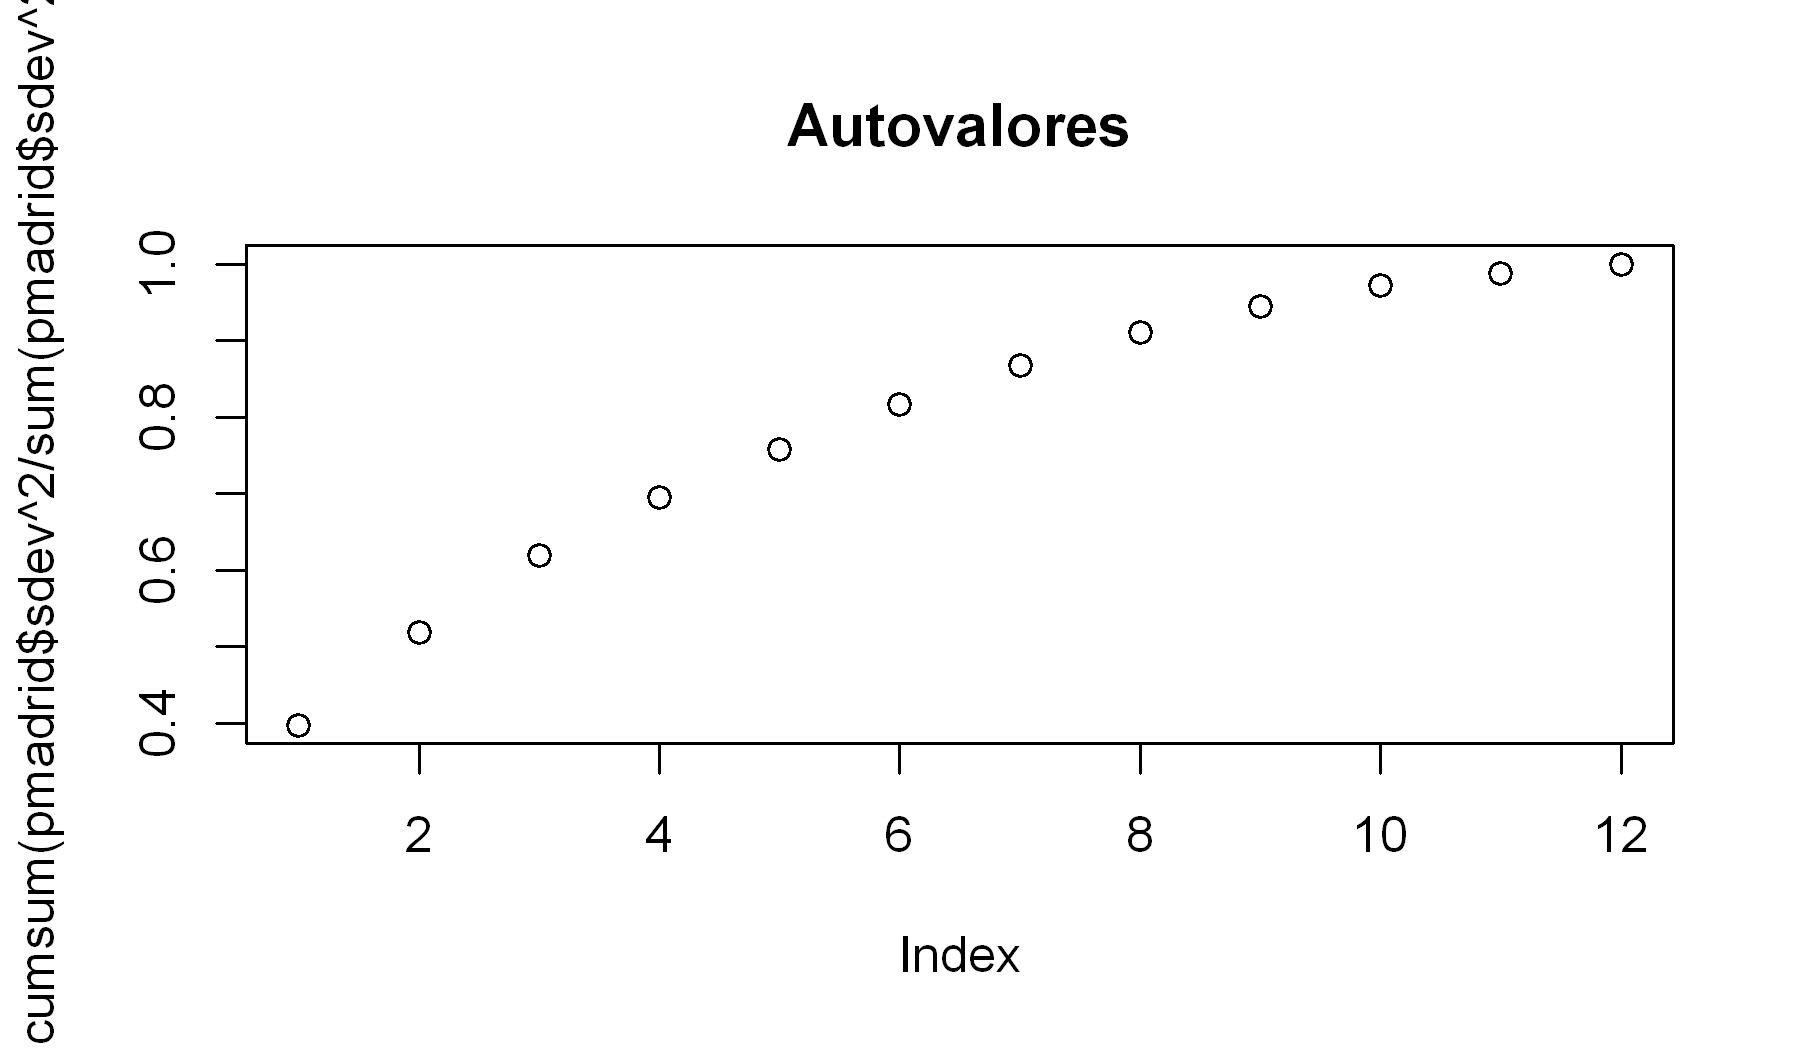

In [38]:
options(repr.plot.height=3.5,repr.plot.width=6,repr.plot.res = 300)

#Utilizamos prcomp para calcular el pca
pmadrid<-prcomp(matrix_madrid,center = TRUE, scale = TRUE)
#Comprobamos que los dos primeros autovalores contienen aproximadamente el 90% de la varianza
plot(pmadrid$sdev^2/sum(pmadrid$sdev^2),main="Autovalores")
plot(cumsum(pmadrid$sdev^2/sum(pmadrid$sdev^2)),main="Autovalores")

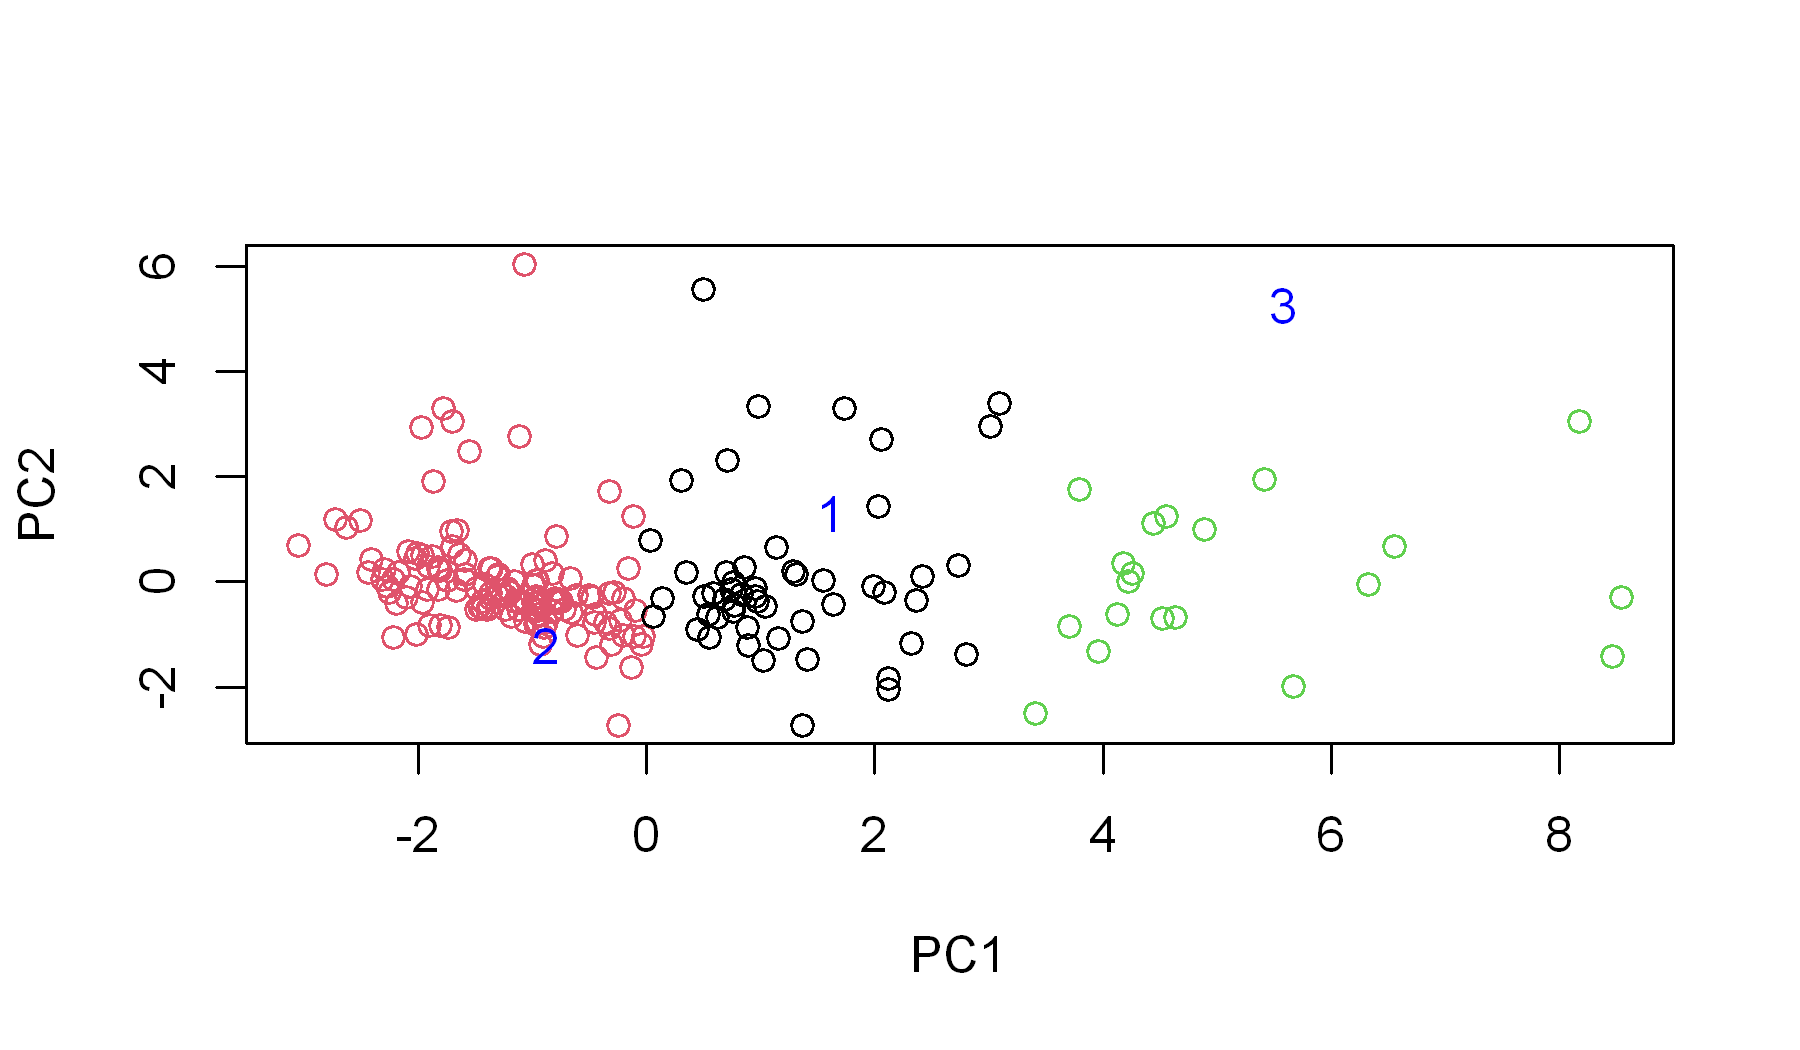

In [39]:
number_of_clusters<-3
number_of_pca<-1
my_clust<-kmeans(pmadrid$x[,c(1:number_of_pca)],number_of_clusters)
plot(pmadrid$x[,c(1,2)],col=my_clust$cluster)
text(x=my_clust$centers[,1], 
     y=my_clust$centers[,1], 
     cex=1, pos=4, labels=(1:nrow(my_clust$centers)),col="blue")

In [40]:
pmadrid$sdev

[1] 2.1835156 1.2110678 1.0940373 0.9549650 0.8711948 0.8363078 0.7828801
 [8] 0.7182427 0.6403554 0.5675813 0.4476664 0.3700341

     
      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
  1   1 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  10  0 0 0 0 0 0 0 0 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  100 0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  101 0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
  102 0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  103 0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  104 0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  105 0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  106 0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  107 0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  108 0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  109 0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  

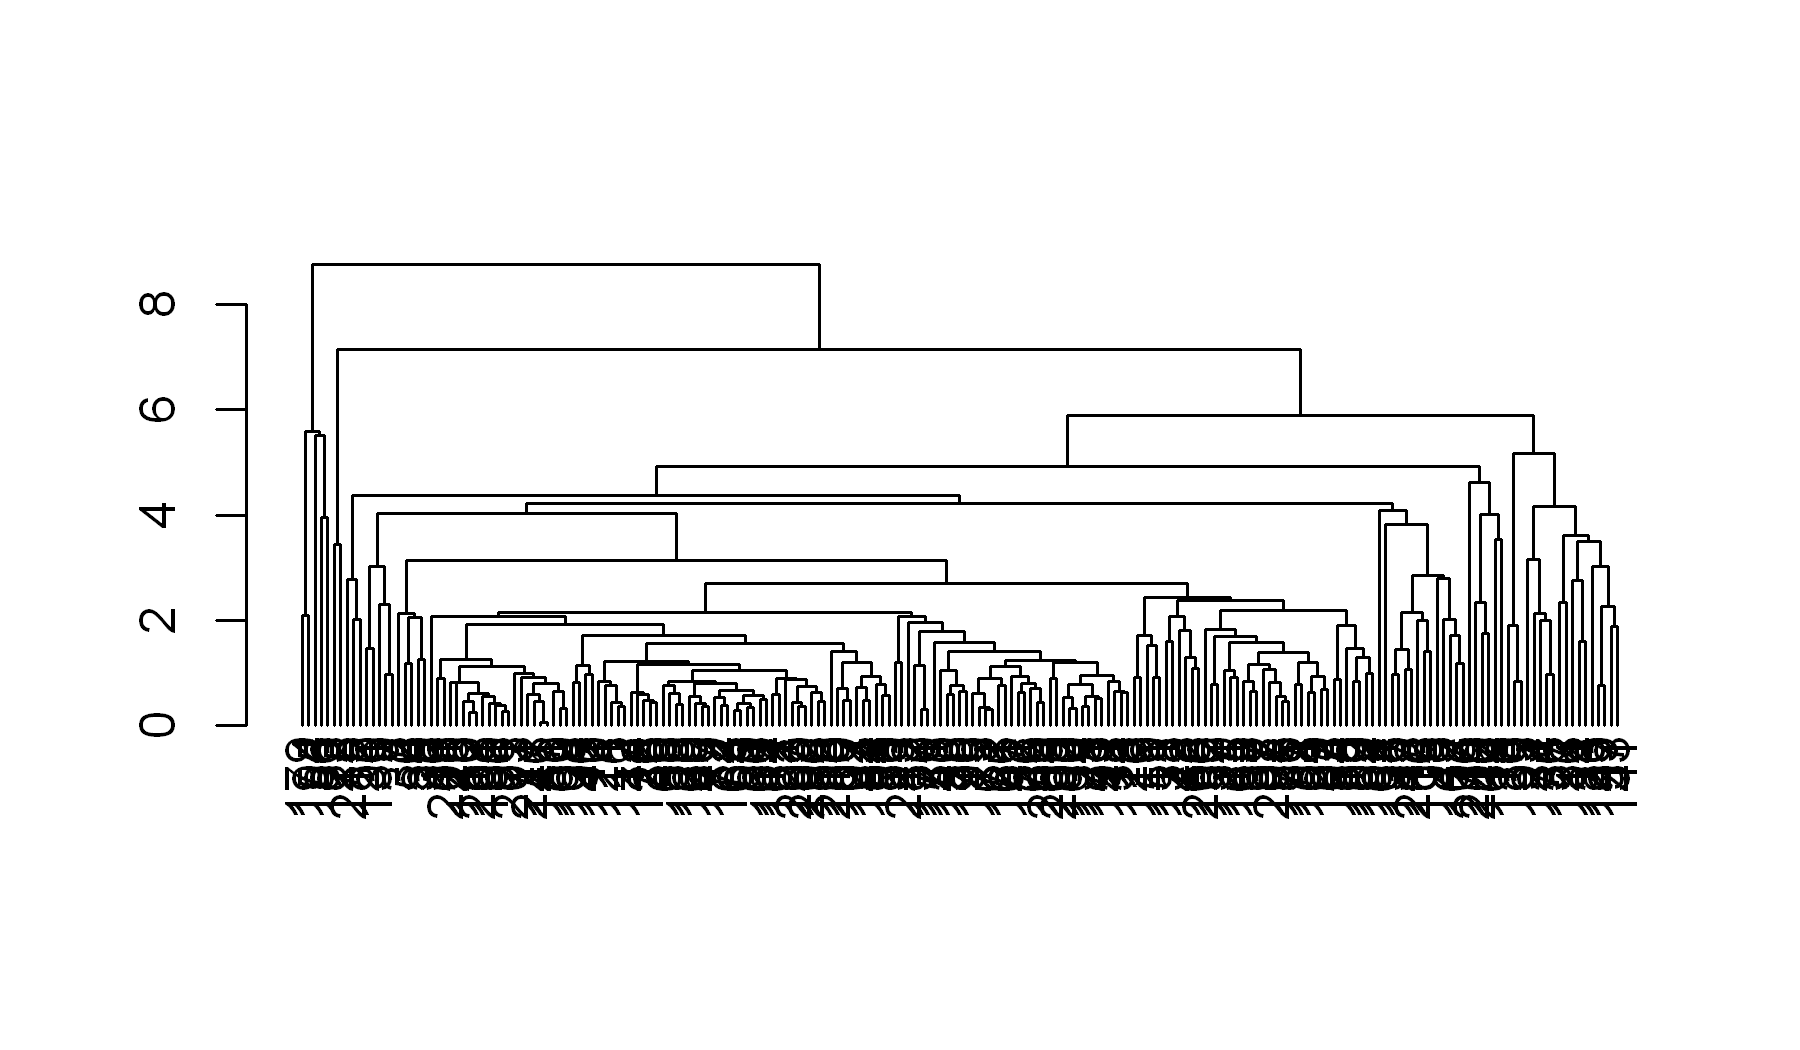

In [41]:
A <- pmadrid$x[,1:5]
d <- dist(A,method = "euclidean")
hc <- hclust(d,method="average")
hcd <- as.dendrogram(hc)
plot(hcd)
table(rownames(A),cutree(hc,h=0.9)) 

In [42]:
df_train<-data.frame(pmadrid$x)
df_train$name<-as.factor(rownames(pmadrid$x))
head(df_train)

PC1        PC2        PC3         PC4        PC5        PC6        
1 -0.6067156 -1.0199554  0.27967902 -0.1892955  0.1301957  0.40908472
2 -0.3087761 -1.1944036 -0.32269428 -0.1208236  0.3622681  0.27754642
3 -0.9271531 -1.1848245 -0.45984679 -0.8793251  0.2406935 -0.39592334
4  1.1386586  0.6616546  2.06572521  0.6216345  1.3018934  0.93276851
5  1.6327301 -0.4249245 -0.34321166 -0.9892154  1.9970101  0.03753198
6 -0.7858042  0.8590939 -0.07168497 -0.7613985 -0.4060499 -0.57394932
  PC7          PC8        PC9        PC10        PC11        PC12        name
1  0.114993547 -0.5177591  0.8391796 -0.10498078  0.47468937  0.09087562 1   
2  0.005282965 -0.5243866  0.6889301 -0.22123938  0.81283602 -0.14011674 2   
3 -0.197785676  0.3204536  0.3010661  0.06752276  0.13450061  0.18652254 3   
4 -1.524512473  0.8722656  0.9929651  0.43740053 -0.34408012 -0.15624404 4   
5 -0.461105233 -0.6352155 -0.2989762  0.60074203  0.87707726 -0.33911804 5   
6  0.172768951  0.1095559 -0.3055258 -0.22118978 -0.05246468  0.12989902 6

In [43]:
#Modelo para buscar pisos que se parecen entre ellos.
model<-glm(df_train,formula="name~.",family=binomial)
summary(model)

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = "name~.", family = binomial, data = df_train)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.920e-03   2.000e-08   2.000e-08   2.000e-08   1.396e-03  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  4022.40   80872.10   0.050    0.960
PC1          1148.40   23275.85   0.049    0.961
PC2          1032.46   21598.12   0.048    0.962
PC3            86.47    8131.24   0.011    0.992
PC4           968.52   20562.92   0.047    0.962
PC5          -258.18    9814.51  -0.026    0.979
PC6          -755.24   15812.74  -0.048    0.962
PC7          -323.46    8436.40  -0.038    0.969
PC8          1429.61   29838.07   0.048    0.962
PC9           155.07    6728.05   0.023    0.982
PC10          721.65   17776.35   0.041    0.968
PC11        -1584.23   31920.13  -0.050    0.960
PC12        -3400.49   69018.68  -0.049    0.961

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.2641e+01

Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?